In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 #loading training dataset       
train_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
test_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
features = ['Constituency ∇', 'Party', 'Total Assets', 'Liabilities','Criminal Case','state']
target= 'Education'

# Concatenate train and test data to ensure consistent encoding
combined = pd.concat([train_df[features], test_df[features]], ignore_index=True)

# Encode categorical features
encoder_dict = {}
for feature in features:
    encoder = LabelEncoder()
    combined[feature] = encoder.fit_transform(combined[feature])
    encoder_dict[feature] = encoder
encoder = LabelEncoder()
train_df[target] = encoder.fit_transform(train_df[target])    

# Assign encoded features back to train and test datasets
for feature in features:
    train_df[feature] = combined.loc[:len(train_df) - 1, feature]
    test_df[feature] = combined.loc[len(train_df):, feature].reset_index(drop=True)

# Verify the encoding
print(train_df.head())

X = train_df[features]  # Features
y = train_df[target]  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model=RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X_train,y_train)

#prediction on  the validation set
pred_val=model.predict(X_val)
f1=f1_score(y_val,pred_val,average='weighted')
print("validation score",f1)

#prediction on the test dataset
X_test_pred=model.predict(test_df[features])
test_df['Education']=X_test_pred
inverse_transformed_education = encoder.inverse_transform(test_df['Education'])
test_df['Education']=inverse_transformed_education
print(test_df.head())
print(test_df['Education'].unique())

# Create a DataFrame with ID and predicted Education
output_df = pd.DataFrame({'ID': test_df['ID'], 'Education': test_df['Education']})

# Save the DataFrame to a CSV file
output_df.to_csv('prediction.csv', index=False)

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv
   ID             Candidate  Constituency ∇  Party  Criminal Case  \
0   0            M.K. Mohan             121      7              4   
1   1  Khatik Ramesh Prasad            1503      4              0   
2   2      Dr. Mantar Gowda            1852      8              0   
3   3          Kundan Kumar             404      4              0   
4   4       Swapan Majumder             300      4              2   

   Total Assets  Liabilities  state  Education  
0            61           33     23          3  
1             1            0     13          1  
2           184           41     11          9  
3           226           46      3          9  
4            55          133     27          3  
validation score 0.1740250717076921
   ID                   Candidate  Constituency ∇  Party  Criminal Case  \
0   0           Geeta Bharat

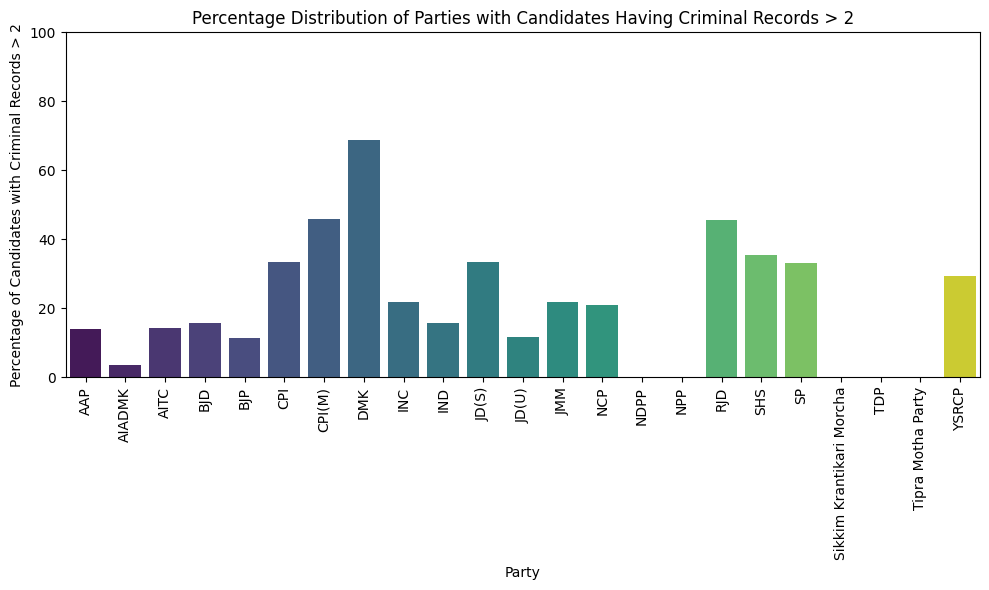

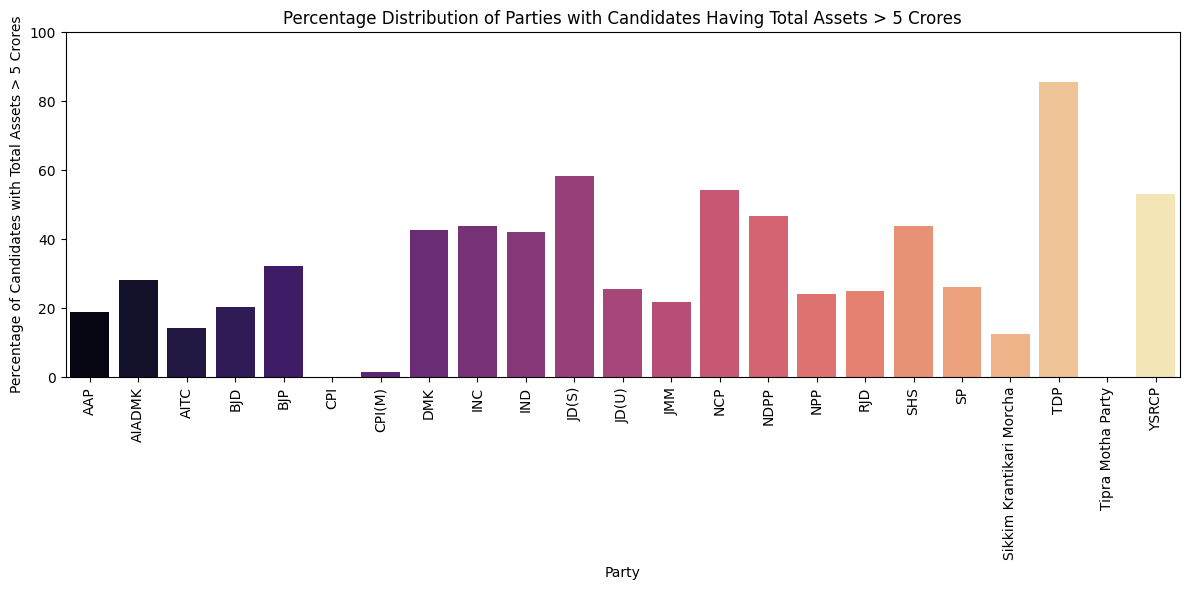

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the dataset
train_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
test_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')

# Concatenate train and test data to ensure consistent encoding
combined = pd.concat([train_df, test_df], ignore_index=True)

# Calculate the total count of candidates in each party having criminal records greater than two
party_criminal_records = combined[combined['Criminal Case'] > 2].groupby('Party').size()

# Calculate the total count of candidates in each party
party_total_candidates = combined.groupby('Party').size()

# Calculate the percentage distribution
party_percentage_distribution = (party_criminal_records / party_total_candidates) * 100

# Plot the percentage distribution of parties
plt.figure(figsize=(10, 6))
sns.barplot(x=party_percentage_distribution.index, y=party_percentage_distribution.values, palette='viridis')
plt.title('Percentage Distribution of Parties with Candidates Having Criminal Records > 2')
plt.xlabel('Party')
plt.ylim(0, 100)
plt.ylabel('Percentage of Candidates with Criminal Records > 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


conversion_factors = {
    'Crore+': 10000000,
    'Lac+': 100000
}

def convert_to_rupees(value):
    value_parts = value.split(' ')
    if len(value_parts) == 2:  # Check if the value contains a space character
        numerical_value = int(value_parts[0].replace(',', ''))  # Extract the numerical part
        unit = value_parts[1]  # Extract the unit part
        if unit in conversion_factors:
            return numerical_value * conversion_factors[unit]
        else:
            return numerical_value  # No conversion needed
    else:
        return int(value.replace(',', ''))  # Use the entire value if no space character is found


# Apply the function to convert values to rupees
combined['Total Assets'] = combined['Total Assets'].apply(convert_to_rupees)
party_wealthy_candidates = combined[combined['Total Assets'] > 50000000].groupby('Party').size()

# Calculate the total count of candidates in each party
party_total_candidates = combined.groupby('Party').size()

# Calculate the percentage distribution
party_percentage_distribution = (party_wealthy_candidates / party_total_candidates) * 100

# Plot the percentage distribution of parties
plt.figure(figsize=(12, 6))  # Adjusted figure size
sns.barplot(x=party_percentage_distribution.index, y=party_percentage_distribution.values, palette='magma')
plt.title('Percentage Distribution of Parties with Candidates Having Total Assets > 5 Crores')
plt.xlabel('Party')
plt.ylim(0, 100)
plt.ylabel('Percentage of Candidates with Total Assets > 5 Crores')
plt.xticks(rotation=90)  # Adjusted rotation angle
plt.tight_layout()
plt.show()